In [3]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.18.0


In [9]:
# load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_image, test_labels) = fashion_mnist.load_data()




In [12]:
# Normalize the images to [0,1] range
x_train = train_images / 255
x_test = test_image / 255

# Reshape to add a channel dimension (for CNN)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation = 'softmax') # 10 classes for Fashion MNIST
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, train_labels, epochs=10, validation_data=(x_test, test_labels))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.7533 - loss: 0.6707 - val_accuracy: 0.8759 - val_loss: 0.3419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.8837 - loss: 0.3136 - val_accuracy: 0.8892 - val_loss: 0.3034
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9036 - loss: 0.2609 - val_accuracy: 0.9050 - val_loss: 0.2662
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9165 - loss: 0.2250 - val_accuracy: 0.9050 - val_loss: 0.2618
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9269 - loss: 0.1989 - val_accuracy: 0.9113 - val_loss: 0.2534
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9337 - loss: 0.1741 - val_accuracy: 0.9105 - val_loss: 0.2572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9404 - loss: 0.1590 - val_accuracy: 0.9097 - val_loss: 0.2666
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9487 -

In [15]:
# Make predictions on two test images
sample_images = x_test[:2]
predictions = model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


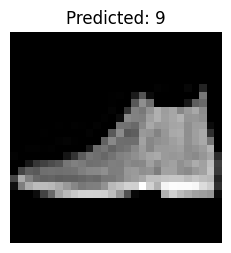

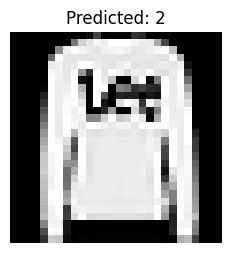

In [16]:
# Display results
for i in range(2):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}")
  plt.axis('Off')
  plt.show()
